# Military Power Clustering Case Study


**In this project, you will perform a cluster analysis to categorize countries according to their military strength characteristics. You will apply <span class="girk">K-Means and Hierarchical clustering</span> and name these clusters as well. you can visit some pages to get some information from the domain for naming clusters.**


data source : https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

# Ingest Data  

In [2]:
df = pd.read_excel("World military power.xlsx",header=[0,1])
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                          1.34       Afghanistan   
1           Albania                          2.31           Albania   
2           Algeria                          0.47           Algeria   
3            Angola                          0.84            Angola   
4         Argentina                          0.65         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                  260.00                  Afghanistan   
1                   19.00                      Albania   
2                  551.00                      Algeria   
3                  295.00                       Angola   
4                  227.00                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                               0.00              Afghanistan   
1                               0.00                  Albania   
2                             103.00                  Algeria   
3                              72.00                   Angola   
4                              24.00                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                          25.00                       Afghanistan   
1                           0.00                           Albania   
2                          22.00                           Algeria   
3                          18.00                            Angola   
4                           7.00                         Argentina   

                                                                  \
  Transport Aircraft Fleet Strength value Trainer Aircraft Fleet   
0                                   30.00            Afghanistan   
1                                    0.00                Albania   
2                                   59.00                Algeria   
3                                   30.00                 Angola   
4                                    9.00              Argentina   

                                                          \
  Trainer Aircraft Fleet value Helicopter Fleet Strength   
0                         0.00               Afghanistan   
1                         0.00                   Albania   
2                        87.00                   Algeria   
3                        47.00                    Angola   
4                        64.00                 Argentina   

                                                                    \
  Helicopter Fleet Strength value Attack Helicopter Fleet Strength   
0                          187.00                      Afghanistan   
1                           19.00                          Albania   
2                          257.00                          Algeria   
3                          126.00                           Angola   
4                          100.00                        Argentina   

                                         Land Strength                      \
  Attack Helicopter Fleet Strength value Tank Strength Tank Strength value   
0                                   0.00   Afghanistan                0.00   
1                                   0.00       Albania                0.00   
2                                  45.00       Algeria              880.00   
3                                  15.00        Angola              379.00   
4                                   0.00     Argentina              370.00   

                                                                             \
  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength   
0      Afghanistan               1,062.00                    

# EDA

## Implement basic steps to see how is your data looks like

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [4]:
df.shape

(138, 60)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum().any()

True

## Convert multi index columns to one level

In [7]:
df.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [8]:
df.columns.values[0][0]+"_"+ df.columns.values[0][1]

'2020 ranking_Military Strength'

In [9]:
df.columns.values

array([('2020 ranking', 'Military Strength'),
       ('2020 ranking', 'Military Strength Power Index'),
       ('Airforce Strength', 'Aircraft Strength'),
       ('Airforce Strength', 'Aircraft Strength value'),
       ('Airforce Strength', 'Fighter/Interceptor Strength'),
       ('Airforce Strength', 'Fighter/Interceptor Strength value'),
       ('Airforce Strength', 'Attack Aircraft Strength'),
       ('Airforce Strength', 'Attack Aircraft Strength value'),
       ('Airforce Strength', 'Transport Aircraft Fleet Strength'),
       ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
       ('Airforce Strength', 'Trainer Aircraft Fleet'),
       ('Airforce Strength', 'Trainer Aircraft Fleet value'),
       ('Airforce Strength', 'Helicopter Fleet Strength'),
       ('Airforce Strength', 'Helicopter Fleet Strength value'),
       ('Airforce Strength', 'Attack Helicopter Fleet Strength'),
       ('Airforce Strength', 'Attack Helicopter Fleet Strength value'),
       ('Land St

In [10]:
# df.columns =["_".join(i) for i in df.columns.values]
df.columns = ['_'.join(tuple(map(str, t))) for t in df.columns.values]

In [11]:
df.columns

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

In [12]:
df.head()

2020 ranking_Military Strength  2020 ranking_Military Strength Power Index  \
0                    Afghanistan                                        1.34   
1                        Albania                                        2.31   
2                        Algeria                                        0.47   
3                         Angola                                        0.84   
4                      Argentina                                        0.65   

  Airforce Strength_Aircraft Strength  \
0                         Afghanistan   
1                             Albania   
2                             Algeria   
3                              Angola   
4                           Argentina   

   Airforce Strength_Aircraft Strength value  \
0                                     260.00   
1                                      19.00   
2                                     551.00   
3                                     295.00   
4                                     227.00   

  Airforce Strength_Fighter/Interceptor Strength  \
0                                    Afghanistan   
1                                        Albania   
2                                        Algeria   
3                                         Angola   
4                                      Argentina   

   Airforce Strength_Fighter/Interceptor Strength value  \
0                                               0.00      
1                                               0.00      
2                                             103.00      
3                                              72.00      
4                                              24.00      

  Airforce Strength_Attack Aircraft Strength  \
0                                Afghanistan   
1                                    Albania   
2                                    Algeria   
3                                     Angola   
4                                  Argentina   

   Airforce Strength_Attack Aircraft Strength value  \
0                                             25.00   
1                                              0.00   
2                                             22.00   
3                                             18.00   
4                                              7.00   

  Airforce Strength_Transport Aircraft Fleet Strength  \
0                                        Afghanistan    
1                                            Albania    
2                                            Algeria    
3                                             Angola    
4                                          Argentina    

   Airforce Strength_Transport Aircraft Fleet Strength value  \
0                                              30.00           
1                                               0.00           
2                                              59.00           
3                                              30.00           
4                                               9.00           

  Airforce Strength_Trainer Aircraft Fleet  \
0                              Afghanistan   
1                                  Albania   
2                                  Algeria   
3                                   Angola   
4                                Argentina   

   Airforce Strength_Trainer Aircraft Fleet value  \
0                                            0.00   
1                                            0.00   
2                                           87.00   
3                                           47.00   
4                                           64.00   

  Airforce Strength_Helicopter Fleet Strength  \
0                                 Afghanistan   
1                                     Albania   
2                                     Algeria   
3                                      Angola   
4                                   Argentina   

   Airforce Strength_Helicopter Fleet Strength value  \
0                     

## Detect and drop duplicated columns

In [13]:
value_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

value_cols

['Airforce Strength_Aircraft Strength value',
 'Airforce Strength_Fighter/Interceptor Strength value',
 'Airforce Strength_Attack Aircraft Strength value',
 'Airforce Strength_Transport Aircraft Fleet Strength value',
 'Airforce Strength_Trainer Aircraft Fleet value',
 'Airforce Strength_Helicopter Fleet Strength value',
 'Airforce Strength_Attack Helicopter Fleet Strength value',
 'Land Strength_Tank Strength value',
 'Land Strength_AFV/APC Strength value',
 'Land Strength_Self-Propelled Artillery Strength value',
 'Land Strength_Towed Artillery Strength value',
 'Land Strength_Rocket Projector Strength value',
 'Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value',
 'Finances_defense spending budget value',
 'Finances_External Debt value',
 'Logistics_Airport Totals value',
 'Natural resources_Oil

In [14]:
# df3 = df.iloc[:,:2].join(value_df)

In [15]:
value_df = df[value_cols].copy()
value_df.insert(0, "country",df["2020 ranking_Military Strength"])
value_df.insert(1, "Military Strength Power Index", df["2020 ranking_Military Strength Power Index"])
value_df.head()

country  Military Strength Power Index  \
0  Afghanistan                           1.34   
1      Albania                           2.31   
2      Algeria                           0.47   
3       Angola                           0.84   
4    Argentina                           0.65   

   Airforce Strength_Aircraft Strength value  \
0                                     260.00   
1                                      19.00   
2                                     551.00   
3                                     295.00   
4                                     227.00   

   Airforce Strength_Fighter/Interceptor Strength value  \
0                                               0.00      
1                                               0.00      
2                                             103.00      
3                                              72.00      
4                                              24.00      

   Airforce Strength_Attack Aircraft Strength value  \
0                                             25.00   
1                                              0.00   
2                                             22.00   
3                                             18.00   
4                                              7.00   

   Airforce Strength_Transport Aircraft Fleet Strength value  \
0                                              30.00           
1                                               0.00           
2                                              59.00           
3                                              30.00           
4                                               9.00           

   Airforce Strength_Trainer Aircraft Fleet value  \
0                                            0.00   
1                                            0.00   
2                                           87.00   
3                                           47.00   
4                                           64.00   

   Airforce Strength_Helicopter Fleet Strength value  \
0                                             187.00   
1                                              19.00   
2                                             257.00   
3                                             126.00   
4                                             100.00   

   Airforce Strength_Attack Helicopter Fleet Strength value  \
0                                               0.00          
1                                               0.00          
2                                              45.00          
3                                              15.00          
4                                               0.00          

   Land Strength_Tank Strength value  Land Strength_AFV/APC Strength value  \
0                               0.00                              1,062.00   
1                               0.00                                467.00   
2                             880.00                              7,361.00   
3                             379.00                                595.00   
4                             370.00                                739.00   

   Land Strength_Self-Propelled Artillery Strength value  \
0                                               0.00       
1                                               0.00       
2                                             320.00       
3                                              28.00       
4                                              83.00       

   Land Strength_Towed Artillery Strength value  \
0                                        176.00   
1                                          0.00   
2                                        240.00   
3                                        357.00   
4                                        172.00   

   Land Strength_Rocket Projector Strength value  \
0                                          50.00   
1                                           0.00   
2                       

## Check for missing values 

In [16]:
value_df.isnull().sum().sort_values(ascending=False)

Geography_Total Coastline Coverage value                     29
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Frigate Fleet Strength value                   23
Navy Strength_Destroyer Fleet Strength value                 23
Navy Strength_Submarine Fleet Strength value                 23
Navy Strength_Navy Fleet Strengths value                     14
Geography_Total Border Coverage value                         9
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Geography_Total Waterway Coverage value                       0
Airforce Strength_Aircraft Strength value                     0
Geography_Total Square Land Area value                        0
Manpower_Total Population value                               0
Manpower_Available Manpower value                             0
Natural resources_Proven Oil Reserves value                   0
Natural resources_Oil Consumption value 

In [17]:
# value_df.isnull()

In [18]:
value_df.isnull().melt(value_name="missing")

variable  missing
0                                   country    False
1                                   country    False
2                                   country    False
3                                   country    False
4                                   country    False
...                                     ...      ...
4273  Geography_Total Border Coverage value    False
4274  Geography_Total Border Coverage value    False
4275  Geography_Total Border Coverage value    False
4276  Geography_Total Border Coverage value    False
4277  Geography_Total Border Coverage value    False

[4278 rows x 2 columns]

<Figure size 288x432 with 0 Axes>

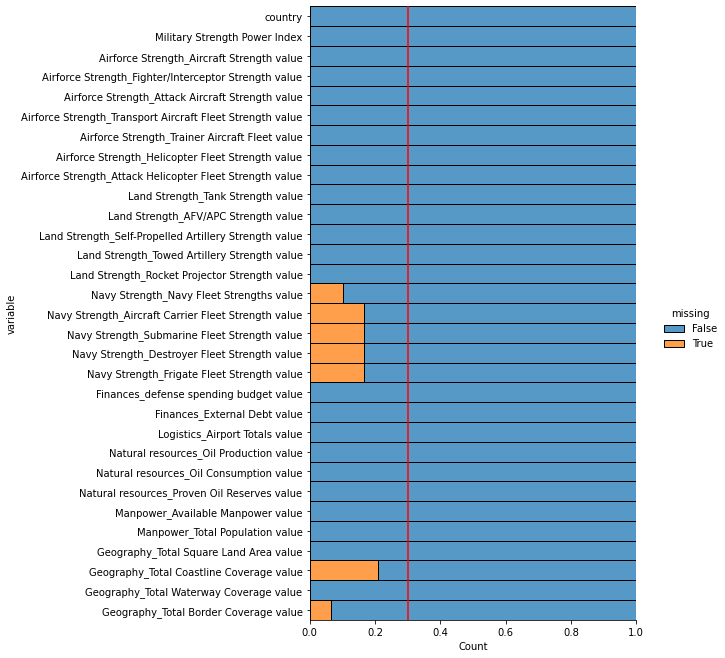

In [19]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [20]:
with pd.option_context('display.max_columns', None):
    display(df[df["Geography_Total Coastline Coverage"].isna()])

2020 ranking_Military Strength  \
5                          Armenia   
7                          Austria   
11                         Belarus   
13                          Bhutan   
14                         Bolivia   
16                        Botswana   
19                    Burkina Faso   
23        Central African Republic   
24                            Chad   
30                         Czechia   
38                        Ethiopia   
48                         Hungary   
62                      Kyrgyzstan   
63                            Laos   
71                            Mali   
74                         Moldova   
75                        Mongolia   
81                           Nepal   
85                           Niger   
88                 North Macedonia   
93                        Paraguay   
103                         Serbia   
106                       Slovakia   
111                    South Sudan   
117                    Switzerland   
120                     Tajikistan   
126                         Uganda   
136                         Zambia   
137                       Zimbabwe   

     2020 ranking_Military Strength Power Index  \
5                                          2.13   
7                                          0.96   
11                                         0.82   
13                                        10.17   
14                                         0.99   
16                                         2.06   
19                                         1.90   
23                                         3.29   
24                                         1.64   
30                                         0.55   
38                                         0.86   
48                                         0.82   
62                                         1.92   
63                                         3.44   
71                                         1.89   
74                                         2.13   
75                                         2.03   
81                                         2.99   
85                                         2.02   
88                                         3.18   
93                                         2.19   
103                                        0.95   
106                                        0.85   
111                                        2.35   
117                                        0.53   
120                                        1.87   
126                                        1.62   
136                                        1.65   
137                                        1.76   

    Airforce Strength_Aircraft Strength  \
5                               Armenia   
7                               Austria   
11                              Belarus   
13                               Bhutan   
14                              Bolivia   
16                             Botswana   
19                         Burkina Faso   
23             Central African Republic   
24                                 Chad   
30                              Czechia   
38                             Ethiopia   
48                              Hungary   
62                           Kyrgyzstan   
63                                 Laos   
71                                 Mali   
74                              Moldova   
75                             Mongolia   
81                                Nepal   
85                                Niger   
88                      North Macedonia   
93                             Paraguay   
103                              Serbia   
106                            Slovakia   
111                         South Sudan   
117                         Switzerland   
120                          Tajikistan   
126                              Uganda   
136                              Zambia   
137                            Zimbabwe   

     Airforce Strength_Aircraft Strength 

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [21]:
value_df.loc[value_df["Geography_Total Coastline Coverage value"].isnull(), ['country',
                                                                             'Navy Strength_Navy Fleet Strengths value',
                                                                             'Navy Strength_Aircraft Carrier Fleet Strength value',
                                                                             'Navy Strength_Submarine Fleet Strength value',
                                                                             'Navy Strength_Destroyer Fleet Strength value',
                                                                             'Navy Strength_Frigate Fleet Strength value',
                                                                             'Geography_Total Waterway Coverage value']]

country  Navy Strength_Navy Fleet Strengths value  \
5                     Armenia                                      0.00   
7                     Austria                                      0.00   
11                    Belarus                                      0.00   
13                     Bhutan                                      0.00   
14                    Bolivia                                    173.00   
16                   Botswana                                       NaN   
19               Burkina Faso                                       NaN   
23   Central African Republic                                       NaN   
24                       Chad                                       NaN   
30                    Czechia                                       NaN   
38                   Ethiopia                                       NaN   
48                    Hungary                                       NaN   
62                 Kyrgyzstan                                       NaN   
63                       Laos                                     36.00   
71                       Mali                                       NaN   
74                    Moldova                                       NaN   
75                   Mongolia                                       NaN   
81                      Nepal                                       NaN   
85                      Niger                                       NaN   
88            North Macedonia                                       NaN   
93                   Paraguay                                     40.00   
103                    Serbia                                     19.00   
106                  Slovakia                                      0.00   
111               South Sudan                                      0.00   
117               Switzerland                                      0.00   
120                Tajikistan                                      0.00   
126                    Uganda                                      8.00   
136                    Zambia                                      0.00   
137                  Zimbabwe                                      0.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
5                                                  NaN     
7                                                  NaN     
11                                                 NaN     
13                                                 NaN     
14                                                0.00     
16                                                 NaN     
19                                                 NaN     
23                                                 NaN     
24                                                 NaN     
30                                                 NaN     
38                                                 NaN     
48                                                 NaN     
62                                                 NaN     
63                                                0.00     
71                                                 NaN     
74                                                 NaN     
75                                                 NaN     
81                                                 NaN     
85                                                 NaN     
88                                                 NaN     
93                                                0.00     
103                                               0.00     
106                                                NaN     
111                                               2.00     
117                                                NaN     
120                                                NaN     
126                                               0.00     
136                                               0.00     
137                            

In [22]:
value_df.loc[
    
    value_df["Geography_Total Coastline Coverage value"].isnull(),
    
    ['Navy Strength_Navy Fleet Strengths value',
     'Navy Strength_Aircraft Carrier Fleet Strength value',
     'Navy Strength_Submarine Fleet Strength value',
     'Navy Strength_Destroyer Fleet Strength value',
     'Navy Strength_Frigate Fleet Strength value']
    
    ] = 0

<Figure size 288x432 with 0 Axes>

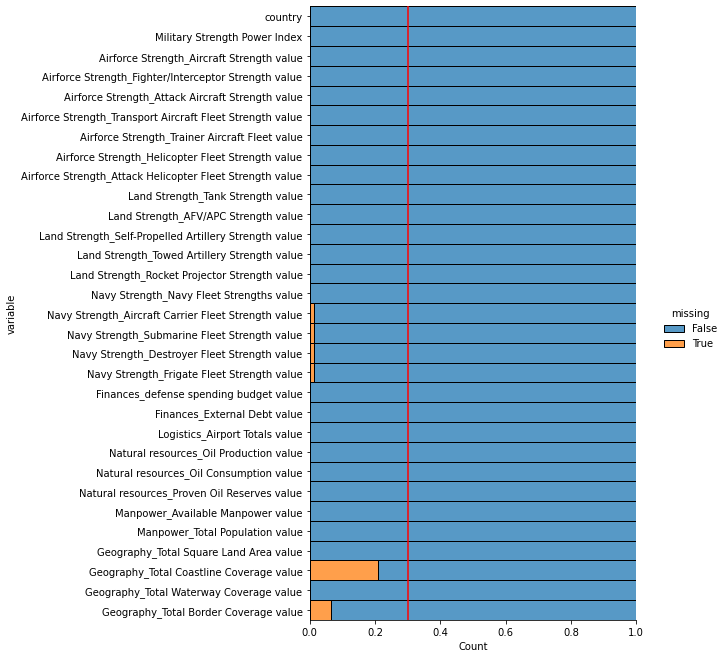

In [23]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [24]:
value_df.loc[value_df['Navy Strength_Aircraft Carrier Fleet Strength value'].isnull()|
             value_df['Navy Strength_Submarine Fleet Strength value'].isnull()|
             value_df['Navy Strength_Destroyer Fleet Strength value'].isnull()|
             value_df['Navy Strength_Frigate Fleet Strength value'].isnull()] 

country  Military Strength Power Index  \
110  South Korea                           0.15   
132   Uzbekistan                           0.81   

     Airforce Strength_Aircraft Strength value  \
110                                   1,649.00   
132                                     185.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
110                                             414.00      
132                                              66.00      

     Airforce Strength_Attack Aircraft Strength value  \
110                                             71.00   
132                                             20.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
110                                              41.00           
132                                              18.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
110                                          298.00   
132                                            2.00   

     Airforce Strength_Helicopter Fleet Strength value  \
110                                             803.00   
132                                              79.00   

     Airforce Strength_Attack Helicopter Fleet Strength value  \
110                                             112.00          
132                                              25.00          

     Land Strength_Tank Strength value  Land Strength_AFV/APC Strength value  \
110                           2,614.00                             14,000.00   
132                             420.00                              1,215.00   

     Land Strength_Self-Propelled Artillery Strength value  \
110                                           3,040.00       
132                                             137.00       

     Land Strength_Towed Artillery Strength value  \
110                                      3,854.00   
132                                          0.00   

     Land Strength_Rocket Projector Strength value  \
110                                         575.00   
132                                          98.00   

     Navy Strength_Navy Fleet Strengths value  \
110                                    234.00   
132                                      0.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
110                                                NaN     
132                                                NaN     

     Navy Strength_Submarine Fleet Strength value  \
110                                           NaN   
132                                           NaN   

     Navy Strength_Destroyer Fleet Strength value  \
110                                           NaN   
132                                           NaN   

     Navy Strength_Frigate Fleet Strength value  \
110                                         NaN   
132                                         NaN   

    Finances_defense spending budget value Finances_External Debt value  \
110                        44,00,00,00,000            3,84,60,00,00,000   
132                           97,50,00,000              16,90,00,00,000   

     Logistics_Airport Totals value Natural resources_Oil Production value  \
110                          111.00                                   0.00   
132                           53.00                              46,070.00   

    Natural resources_Oil Consumption value  \
110                               28,00,000   
132                                1,42,000   

    Natural resources_Proven Oil Reserves value  \
110                                        0.00   
132                                59,40,00,000   

    Manpower_Available Manpower value Manpower_Total Population value  \
110                       2,57,09,049                     5,14,18,097   
132                       1,59,12,566                     3,00,23,709   

    Geography_Total Square Land Area value  \
110                              99

In [25]:
#value_df[value_df["country"] == "Uzbekistan"].fillna(0)

value_df.loc[value_df["country"] == "Uzbekistan",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

Navy Strength_Navy Fleet Strengths value  \
132                                      0.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
132                                                NaN     

     Navy Strength_Submarine Fleet Strength value  \
132                                           NaN   

     Navy Strength_Destroyer Fleet Strength value  \
132                                           NaN   

     Navy Strength_Frigate Fleet Strength value  
132                                         NaN

In [26]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] = 0

In [27]:
value_df.loc[value_df["country"] == "South Korea",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

Navy Strength_Navy Fleet Strengths value  \
110                                    234.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
110                                                NaN     

     Navy Strength_Submarine Fleet Strength value  \
110                                           NaN   

     Navy Strength_Destroyer Fleet Strength value  \
110                                           NaN   

     Navy Strength_Frigate Fleet Strength value  
110                                         NaN

In [28]:
value_df.loc[((value_df['Navy Strength_Navy Fleet Strengths value'] > 200) & 
             (value_df['Navy Strength_Navy Fleet Strengths value'] < 250)),
            ['country',
             'Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

country  Navy Strength_Navy Fleet Strengths value  \
2        Algeria                                    201.00   
39       Finland                                    246.00   
55         Italy                                    249.00   
110  South Korea                                    234.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
2                                                 0.00     
39                                                0.00     
55                                                2.00     
110                                                NaN     

     Navy Strength_Submarine Fleet Strength value  \
2                                            6.00   
39                                           0.00   
55                                           8.00   
110                                           NaN   

     Navy Strength_Destroyer Fleet Strength value  \
2                                            0.00   
39                                           0.00   
55                                           4.00   
110                                           NaN   

     Navy Strength_Frigate Fleet Strength value  
2                                          5.00  
39                                         0.00  
55                                        12.00  
110                                         NaN

In [29]:
value_df.loc[value_df["country"] == "France",
             ['country',
             'Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]] 

country  Navy Strength_Navy Fleet Strengths value  \
40  France                                    180.00   

    Navy Strength_Aircraft Carrier Fleet Strength value  \
40                                               4.00     

    Navy Strength_Submarine Fleet Strength value  \
40                                          9.00   

    Navy Strength_Destroyer Fleet Strength value  \
40                                         11.00   

    Navy Strength_Frigate Fleet Strength value  
40                                       11.00

In [30]:
# All the numbers derived from South Korea Navy wikipeida page
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Aircraft Carrier Fleet Strength value'] = 2
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Submarine Fleet Strength value'] = 19
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Destroyer Fleet Strength value'] = 12
value_df.loc[value_df["country"] == "South Korea",'Navy Strength_Frigate Fleet Strength value'] = 12

<Figure size 288x432 with 0 Axes>

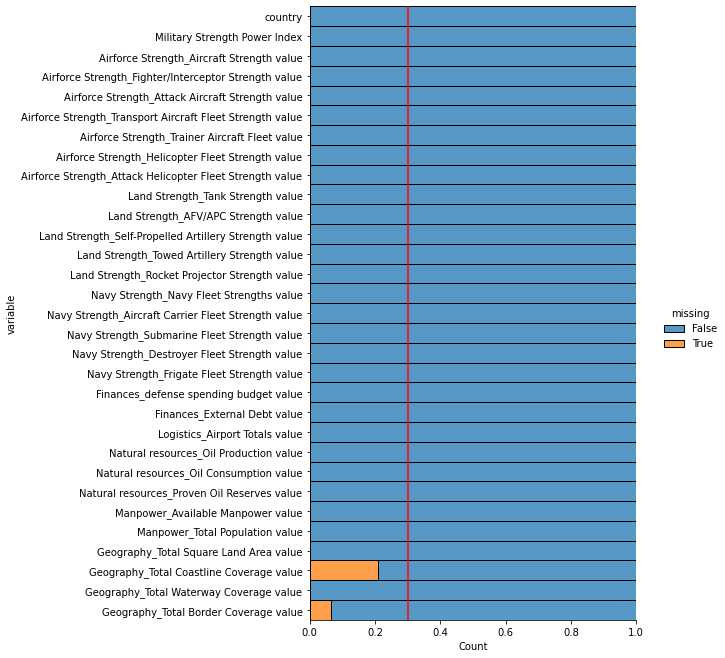

In [31]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [32]:
value_df.loc[value_df['Geography_Total Coastline Coverage value'].isnull()]

country  Military Strength Power Index  \
5                     Armenia                           2.13   
7                     Austria                           0.96   
11                    Belarus                           0.82   
13                     Bhutan                          10.17   
14                    Bolivia                           0.99   
16                   Botswana                           2.06   
19               Burkina Faso                           1.90   
23   Central African Republic                           3.29   
24                       Chad                           1.64   
30                    Czechia                           0.55   
38                   Ethiopia                           0.86   
48                    Hungary                           0.82   
62                 Kyrgyzstan                           1.92   
63                       Laos                           3.44   
71                       Mali                           1.89   
74                    Moldova                           2.13   
75                   Mongolia                           2.03   
81                      Nepal                           2.99   
85                      Niger                           2.02   
88            North Macedonia                           3.18   
93                   Paraguay                           2.19   
103                    Serbia                           0.95   
106                  Slovakia                           0.85   
111               South Sudan                           2.35   
117               Switzerland                           0.53   
120                Tajikistan                           1.87   
126                    Uganda                           1.62   
136                    Zambia                           1.65   
137                  Zimbabwe                           1.76   

     Airforce Strength_Aircraft Strength value  \
5                                        64.00   
7                                       120.00   
11                                      202.00   
13                                        2.00   
14                                       69.00   
16                                       45.00   
19                                       16.00   
23                                        3.00   
24                                       35.00   
30                                       95.00   
38                                       86.00   
48                                       47.00   
62                                        5.00   
63                                       33.00   
71                                       29.00   
74                                        3.00   
75                                        9.00   
81                                       16.00   
85                                       16.00   
88                                       20.00   
93                                       33.00   
103                                     109.00   
106                                      47.00   
111                                      19.00   
117                                     169.00   
120                                      25.00   
126                                      48.00   
136                                     108.00   
137                                      90.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
5                                                 0.00      
7                                                15.00      
11                                               39.00      
13                                                0.00      
14                                                0.00      
16                                               10.00      
19                                                0.00      
23                                                0.00      
24                                                0

In [33]:
value_df.loc[value_df['Geography_Total Coastline Coverage value'].isnull(), 
                      'Geography_Total Coastline Coverage value']  = 0 

In [34]:
value_df.loc[value_df['Geography_Total Border Coverage value'].isnull()]

country  Military Strength Power Index  \
6      Australia                           0.32   
9        Bahrain                           1.85   
57         Japan                           0.15   
69    Madagascar                           3.09   
83   New Zealand                           1.37   
95   Philippines                           0.79   
105    Singapore                           0.80   
113    Sri Lanka                           1.47   
119       Taiwan                           0.40   

     Airforce Strength_Aircraft Strength value  \
6                                       464.00   
9                                       109.00   
57                                    1,561.00   
69                                        6.00   
83                                       48.00   
95                                      171.00   
105                                     235.00   
113                                      77.00   
119                                     744.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
6                                                82.00      
9                                                17.00      
57                                              279.00      
69                                                0.00      
83                                                0.00      
95                                                0.00      
105                                             100.00      
113                                               0.00      
119                                             289.00      

     Airforce Strength_Attack Aircraft Strength value  \
6                                                6.00   
9                                                0.00   
57                                              12.00   
69                                               0.00   
83                                               0.00   
95                                              19.00   
105                                              0.00   
113                                              0.00   
119                                              0.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
6                                                38.00           
9                                                 2.00           
57                                               60.00           
69                                                0.00           
83                                                7.00           
95                                               23.00           
105                                               9.00           
113                                              15.00           
119                                              19.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
6                                            174.00   
9                                             37.00   
57                                           427.00   
69                                             0.00   
83                                            13.00   
95                                            24.00   
105                                           36.00   
113                                            6.00   
119                                          207.00   

     Airforce Strength_Helicopter Fleet Strength value  \
6                                               133.00   
9                                                65.00   
57                                              637.00   
69                                                6.00   
83                                               22.00   
95                                               97.00   
105                                              77.00   
113                                              54.00   
119                                             210.00   

     Airforce Strength

In [35]:
value_df.loc[value_df['Geography_Total Border Coverage value'].isnull(), 
                      'Geography_Total Border Coverage value' ] = 0

<Figure size 288x432 with 0 Axes>

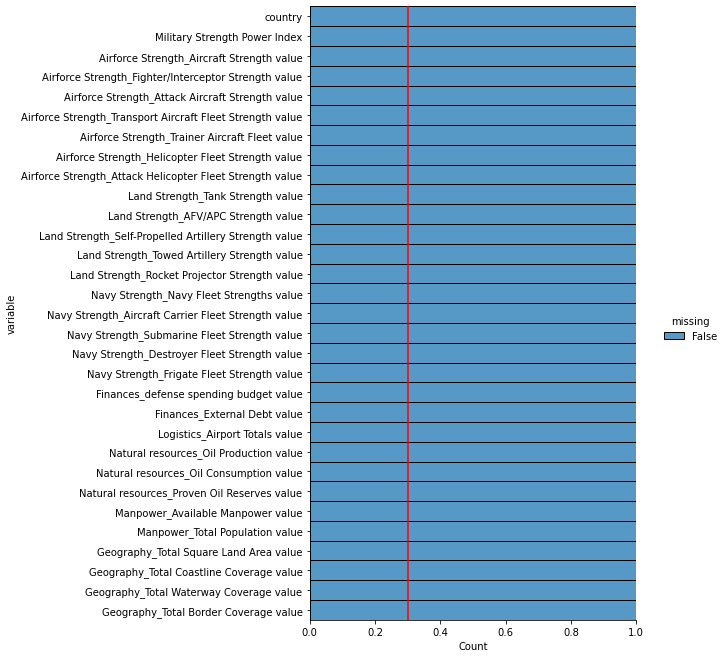

In [36]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [37]:
value_df.reset_index(drop=True,inplace=True)

## Fix the dtypes

In [38]:
value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [39]:
value_df.select_dtypes("object")

country Finances_defense spending budget value  \
0    Afghanistan                        12,00,00,00,000   
1        Albania                           25,00,00,000   
2        Algeria                        13,00,00,00,000   
3         Angola                         7,00,00,00,000   
4      Argentina                         4,20,00,00,000   
..           ...                                    ...   
133    Venezuela                           74,50,00,000   
134      Vietnam                         5,50,00,00,000   
135        Yemen                         1,40,00,00,000   
136       Zambia                            4,00,00,000   
137     Zimbabwe                           10,00,00,000   

    Finances_External Debt value Natural resources_Oil Production value  \
0                 2,84,00,00,000                                   0.00   
1                 9,50,50,00,000                              16,000.00   
2                 6,26,00,00,000                              13,06,000   
3                42,08,00,00,000                              16,66,000   
4              2,14,90,00,00,000                               4,79,400   
..                           ...                                    ...   
133            1,00,30,00,00,000                              20,07,000   
134              96,58,00,00,000                               2,71,400   
135               7,06,80,00,000                              12,260.00   
136              11,66,00,00,000                                   0.00   
137               9,35,70,00,000                                   0.00   

    Natural resources_Oil Consumption value  \
0                                  5,500.00   
1                                 42,500.00   
2                                  3,25,000   
3                                 82,300.00   
4                                  6,85,000   
..                                      ...   
133                                5,75,000   
134                                5,25,000   
135                                1,45,000   
136                               21,000.00   
137                               19,500.00   

    Natural resources_Proven Oil Reserves value  \
0                                          0.00   
1                                  16,83,00,000   
2                               12,20,00,00,000   
3                                8,27,30,00,000   
4                                2,18,50,00,000   
..                                          ...   
133                           3,00,90,00,00,000   
134                              4,40,00,00,000   
135                              3,00,00,00,000   
136                                        0.00   
137                                        0.00   

    Manpower_Available Manpower value Manpower_Total Population value  \
0                         1,43,25,743                     3,49,40,837   
1                           15,19,438                       30,57,220   
2                         2,07,41,263                     4,16,57,488   
3                           62,44,205                     3,03,55,880   
4                         2,01,79,430                     4,46,94,198   
..                                ...                             ...   
133                       1,42,60,129                     3,16,89,176   
134                       5,10,43,216                     9,70,40,334   
135                       1,12,66,221                     2,86,67,230   
136                         61,66,905                     1,64,45,079   
137                         55,84,086                     1,40,30,368   

    Geography_Total Square Land Area value  \
0                                 6,52,230   
1                                28,748.00   
2                                23,81,741   
3                                12,46,700   
4                                27,80,400   
..                                     ...   
133                   

In [40]:
value_df.select_dtypes("object")["Natural resources_Oil Production value"].str.replace(",","")

0          NaN
1          NaN
2      1306000
3      1666000
4       479400
        ...   
133    2007000
134     271400
135        NaN
136        NaN
137        NaN
Name: Natural resources_Oil Production value, Length: 138, dtype: object

In [41]:
columns = value_df.select_dtypes("object").columns
columns

Index(['country', 'Finances_defense spending budget value',
       'Finances_External Debt value',
       'Natural resources_Oil Production value',
       'Natural resources_Oil Consumption value',
       'Natural resources_Proven Oil Reserves value',
       'Manpower_Available Manpower value', 'Manpower_Total Population value',
       'Geography_Total Square Land Area value',
       'Geography_Total Coastline Coverage value',
       'Geography_Total Waterway Coverage value'],
      dtype='object')

In [42]:
for col in columns[1:]:
    value_df[col]  = value_df[col].astype("str")
    value_df[col]  = value_df.select_dtypes("object")[col].str.replace(',','')
    value_df[col]  = value_df[col].astype("float")

In [43]:
 value_df.select_dtypes("object")

country
0    Afghanistan
1        Albania
2        Algeria
3         Angola
4      Argentina
..           ...
133    Venezuela
134      Vietnam
135        Yemen
136       Zambia
137     Zimbabwe

[138 rows x 1 columns]

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [44]:
value_df.columns

Index(['country', 'Military Strength Power Index',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength value',
       'Land Strength_AFV/APC Strength value',
       'Land Strength_Self-Propelled Artillery Strength value',
       'Land Strength_Towed Artillery Strength value',
       'Land Strength_Rocket Projector Strength value',
       'Navy Strength_Navy Fleet Strengths value',
       'Navy Strength_Aircraft Carrier Fleet Strength value',
       'Navy Strength_Submarine Fleet Strength value',
       'Navy Strength_Destroyer Fleet Strength value',
       'Navy Strength_Frigate Flee

In [45]:
value_df.drop(['Geography_Total Square Land Area value',
               'Geography_Total Coastline Coverage value',
               'Geography_Total Waterway Coverage value',
               'Geography_Total Border Coverage value'],axis=1,inplace=True)

In [46]:
value_df.shape

(138, 27)

## Visualy inspect the some features

In [47]:
import plotly.express as px

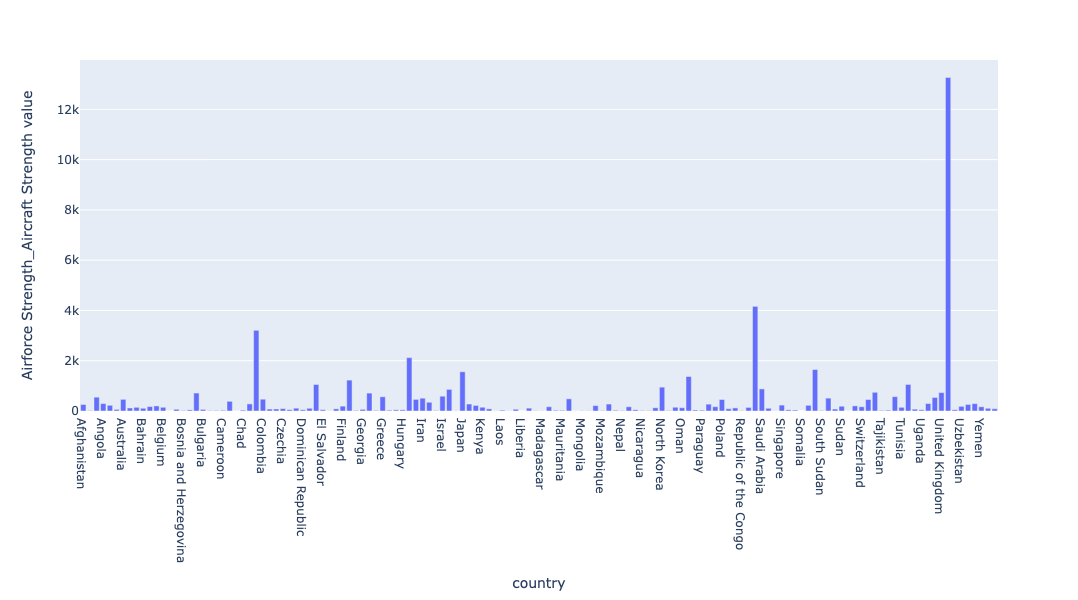

In [48]:
#plt.figure(figsize=(20,10)
fig = px.bar(value_df,x= "country" , y = value_df["Airforce Strength_Aircraft Strength value"], width=1100, height=600)
fig.show()

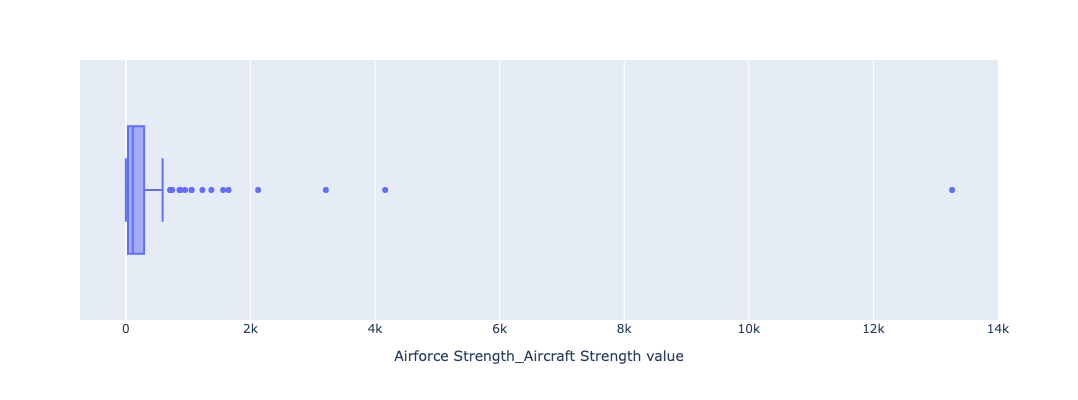

In [49]:
fig = px.box(value_df, x = value_df["Airforce Strength_Aircraft Strength value"],
             hover_name=value_df["country"], width=1100, height=400)
fig.show()

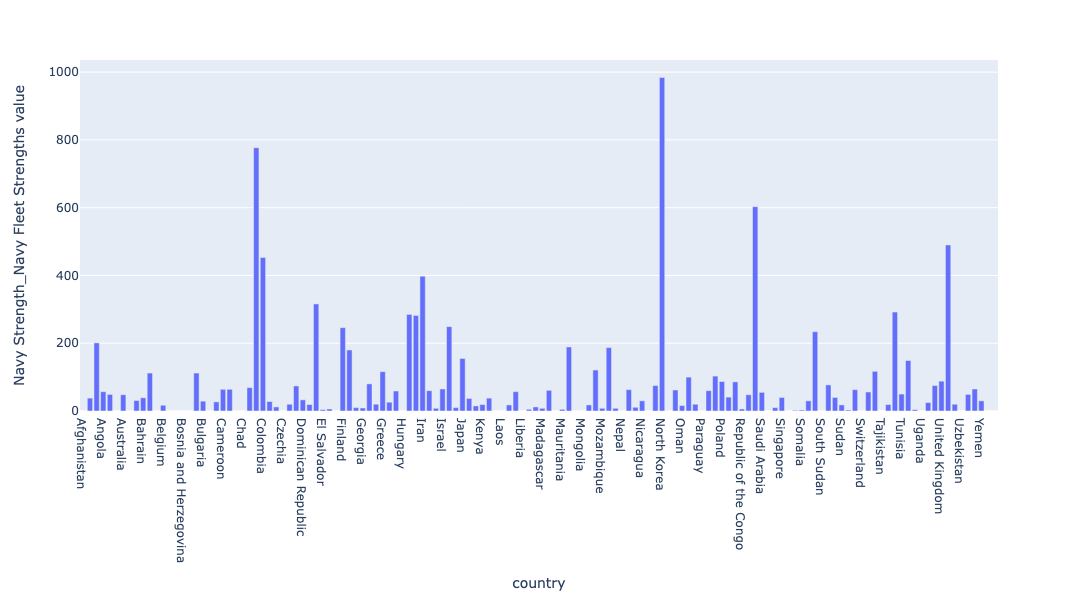

In [50]:
fig = px.bar(value_df,x= "country" , y = value_df['Navy Strength_Navy Fleet Strengths value'], width=1100, height=600)
fig.show()

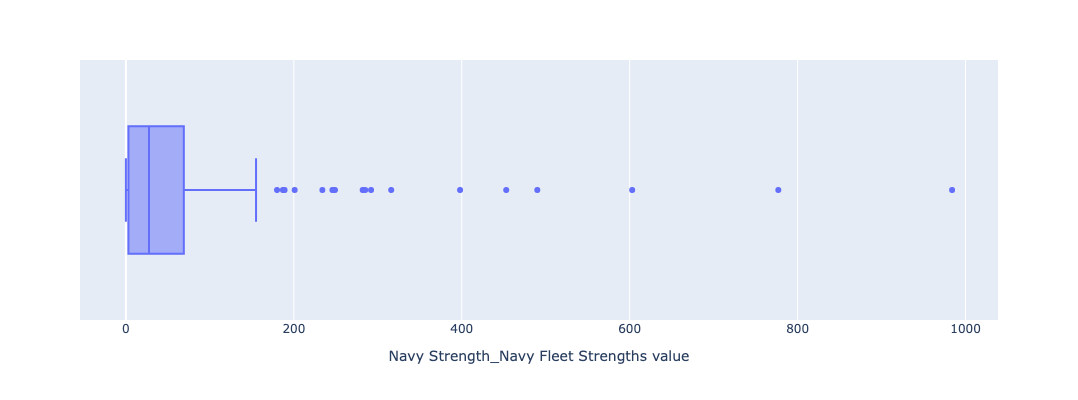

In [51]:
fig = px.box(value_df, x = value_df["Navy Strength_Navy Fleet Strengths value"],
             hover_name=value_df["country"], width=1100, height=400)

fig.show()

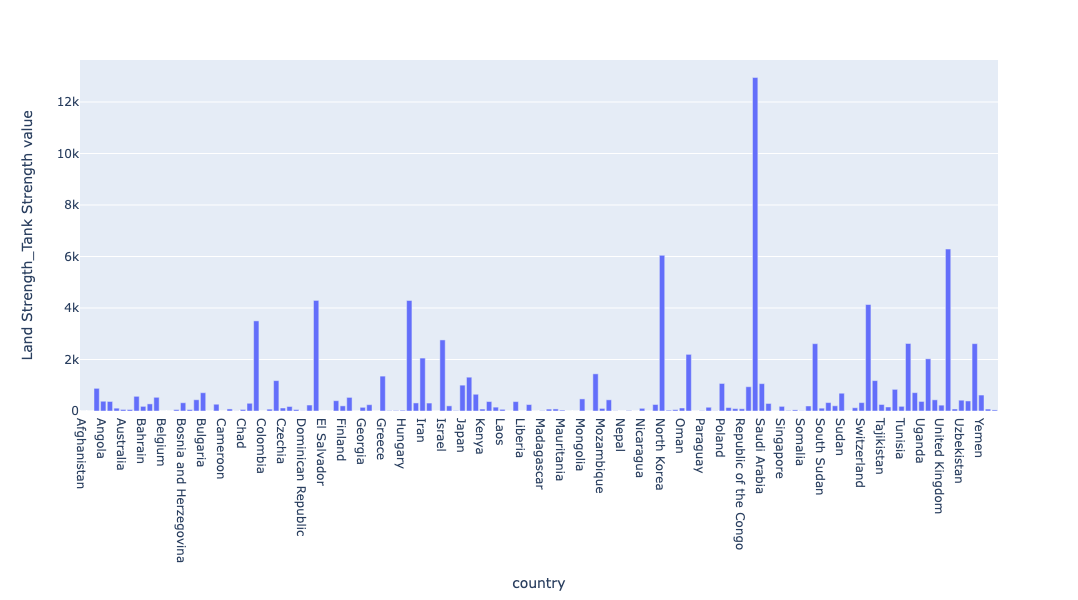

In [52]:
fig = px.bar(value_df,x= "country" , y = value_df['Land Strength_Tank Strength value'], width=1100, height=600)
fig.show()

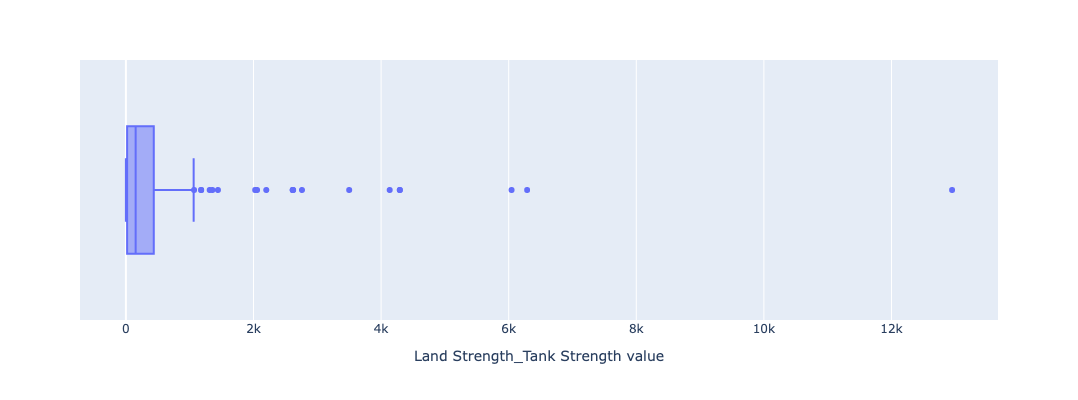

In [53]:
fig = px.box(value_df, x = value_df["Land Strength_Tank Strength value"],
             hover_name=value_df["country"], width=1100, height=400)

fig.show()

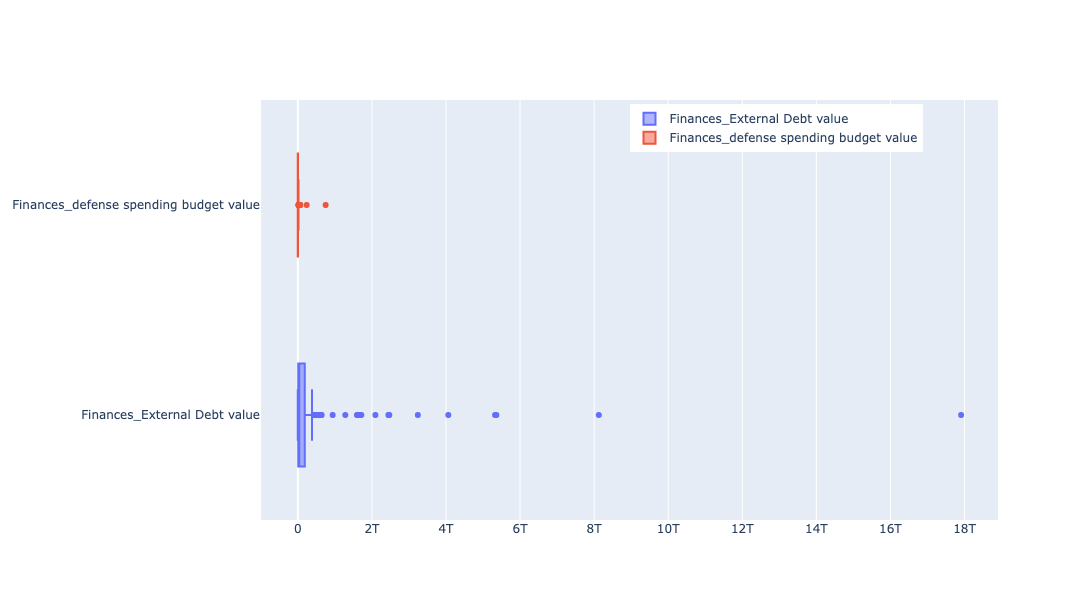

In [54]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=value_df["Finances_External Debt value"],
              hovertext=value_df["country"],
              name = "Finances_External Debt value")
             )
fig.add_trace(go.Box(x=value_df["Finances_defense spending budget value"],
                     hovertext=value_df["country"],
                    name = "Finances_defense spending budget value")
             )
fig.update_layout(autosize=False, width=1100, height=600, showlegend=True, legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.5))

fig.show()

## Decriptive statistics

In [55]:
value_df.describe().T

count               mean  \
Military Strength Power Index                      138.00               1.46   
Airforce Strength_Aircraft Strength value          138.00             388.47   
Airforce Strength_Fighter/Interceptor Strength ... 138.00              81.57   
Airforce Strength_Attack Aircraft Strength value   138.00              25.76   
Airforce Strength_Transport Aircraft Fleet Stre... 138.00              30.23   
Airforce Strength_Trainer Aircraft Fleet value     138.00              82.83   
Airforce Strength_Helicopter Fleet Strength value  138.00             154.07   
Airforce Strength_Attack Helicopter Fleet Stren... 138.00              25.62   
Land Strength_Tank Strength value                  138.00             646.57   
Land Strength_AFV/APC Strength value               138.00           2,485.70   
Land Strength_Self-Propelled Artillery Strength... 138.00             212.16   
Land Strength_Towed Artillery Strength value       138.00             393.98   
Land Strength_Rocket Projector Strength value      138.00             156.93   
Navy Strength_Navy Fleet Strengths value           138.00              74.36   
Navy Strength_Aircraft Carrier Fleet Strength v... 138.00               0.32   
Navy Strength_Submarine Fleet Strength value       138.00               3.98   
Navy Strength_Destroyer Fleet Strength value       138.00               1.71   
Navy Strength_Frigate Fleet Strength value         138.00               2.89   
Finances_defense spending budget value             138.00  13,993,631,641.21   
Finances_External Debt value                       138.00 519,498,263,043.48   
Logistics_Airport Totals value                     138.00             290.04   
Natural resources_Oil Production value             138.00         585,552.36   
Natural resources_Oil Consumption value            138.00         702,018.70   
Natural resources_Proven Oil Reserves value        138.00  11,944,118,420.29   
Manpower_Available Manpower value                  138.00      25,442,969.93   
Manpower_Total Population value                    138.00      53,180,584.65   

                                                                    std  \
Military Strength Power Index                                      1.32   
Airforce Strength_Aircraft Strength value                      1,231.98   
Airforce Strength_Fighter/Interceptor Strength ...               230.32   
Airforce Strength_Attack Aircraft Strength value                  94.53   
Airforce Strength_Transport Aircraft Fleet Stre...                92.33   
Airforce Strength_Trainer Aircraft Fleet value                   240.80   
Airforce Strength_Helicopter Fleet Strength value                520.18   
Airforce Strength_Attack Helicopter Fleet Stren...                97.33   
Land Strength_Tank Strength value                              1,515.46   
Land Strength_AFV/APC Strength value                           5,410.55   
Land Strength_Self-Propelled Artillery Strength...               688.03   
Land Strength_Towed Artillery Strength value                     805.78   
Land Strength_Rocket Projector Strength value                    484.38   
Navy Strength_Navy Fleet Strengths value                         141.04   
Navy Strength_Aircraft Carrier Fleet Strength v...                 1.80   
Navy Strength_Submarine Fleet Strength value                      12.60   
Navy Strength_Destroyer Fleet Strength value                       9.15   
Navy Strength_Frigate Fleet Strength value                         5.97   
Finances_defense spending budget value                67,311,892,724.13   
Finances_External Debt value                       1,847,251,527,661.88   
Logistics_Airport Totals value                                 1,212.97   
Natural resources_Oil Production value                     1,667,138.90   
Natural resources_Oil Consumption value                    2,168,810.06   
Natural resources_Proven Oil Reserves value           42,750,903,273.13   
Manpower_Availab

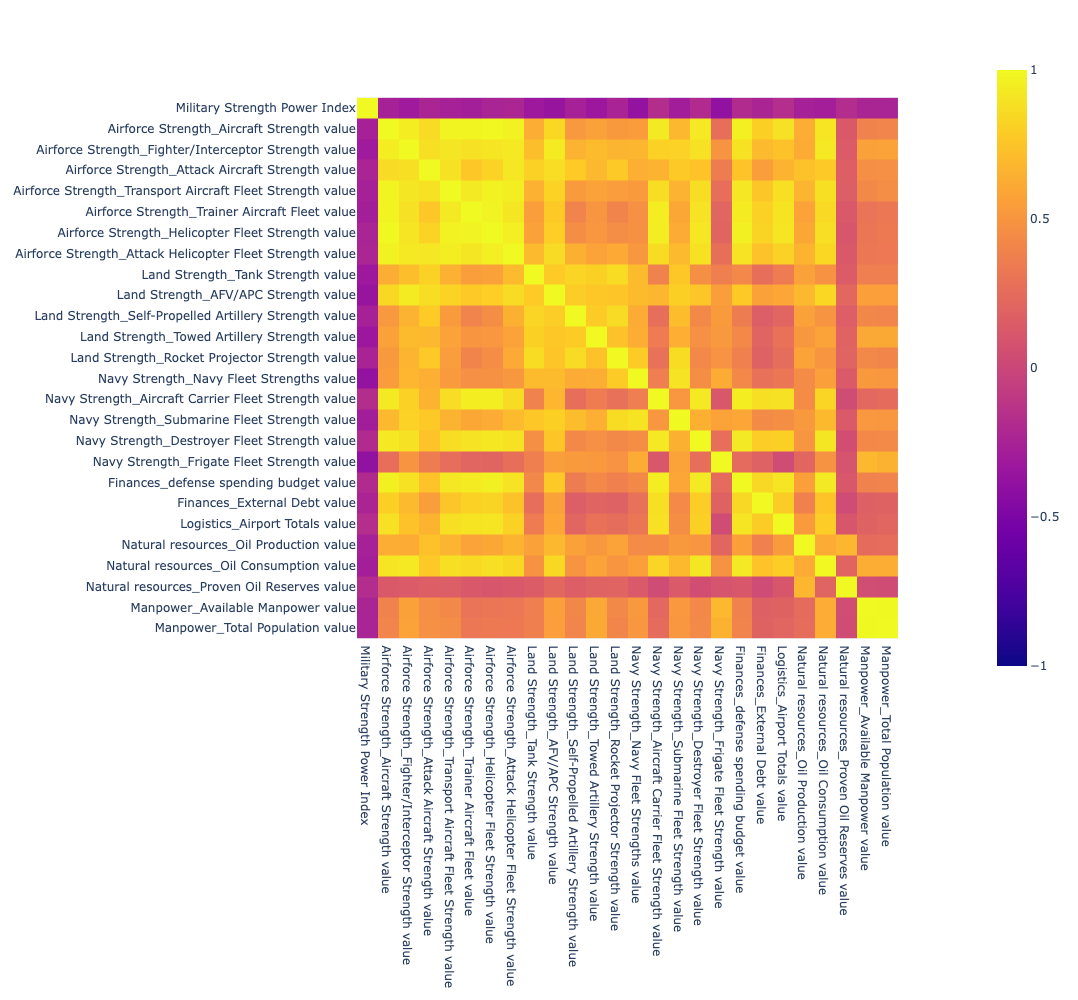

In [56]:
fig = px.imshow(value_df.corr(),
                height=1000,
                width=1000,
                range_color=[-1,1])
fig.show()

# Data Preprocessing

In [57]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [58]:
X = value_df.drop(["country"], axis=1)

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [60]:
from pyclustertend import hopkins

In [61]:
hopkins(X, X.shape[0])

0.07570757378307019

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [62]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [63]:
ssd

[1909.4825400661186,
 1294.9499703756715,
 1032.0768081318024,
 873.344701752121,
 700.9826518601566,
 596.8408007852493,
 498.2157649891474,
 440.83886497770044]

In [64]:
pd.Series(ssd).diff()

0       NaN
1   -614.53
2   -262.87
3   -158.73
4   -172.36
5   -104.14
6    -98.63
7    -57.38
dtype: float64

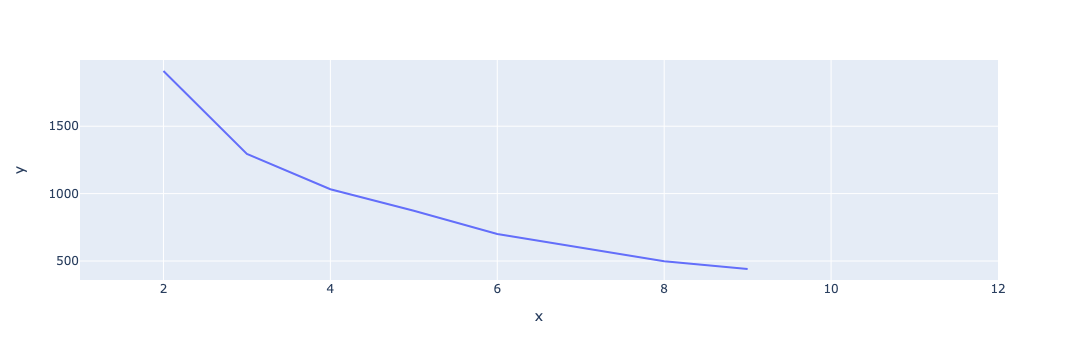

In [65]:
fig = px.line(x = K, y = ssd, range_x=[1,12], hover_name = pd.Series(ssd).diff().values )

fig.show()

In [66]:
from yellowbrick.cluster import KElbowVisualizer

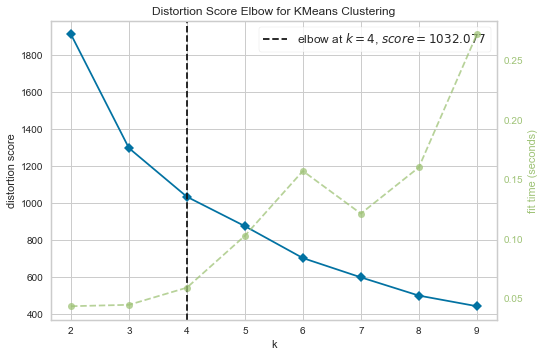

In [67]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof();

### Model Building and label visualisation

In [68]:
model = KMeans(n_clusters=4,random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [69]:
model.inertia_

1032.0768081318024

In [70]:
model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0], dtype=int32)

In [71]:
value_df["cluster"] = model.labels_

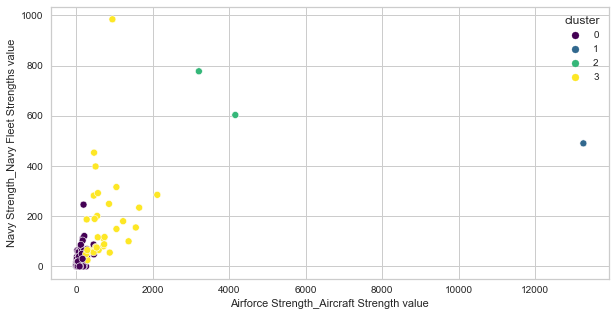

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(value_df["Airforce Strength_Aircraft Strength value"], 
                value_df["Navy Strength_Navy Fleet Strengths value"], hue= value_df.cluster,palette= "viridis");

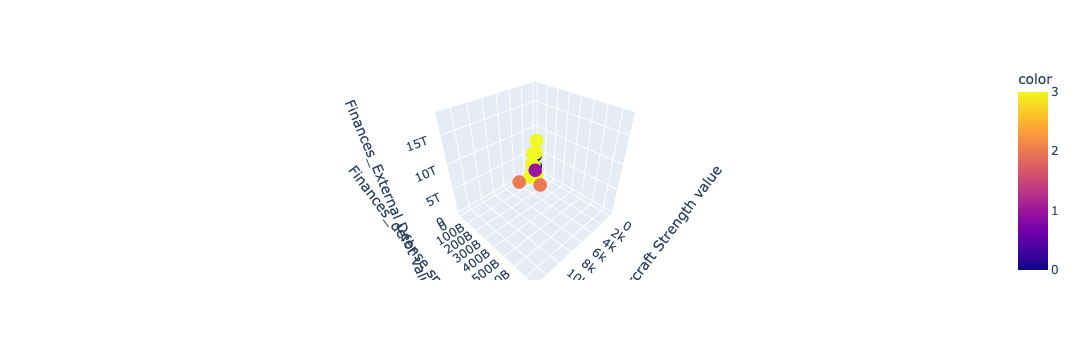

In [73]:
fig = px.scatter_3d(x=value_df["Airforce Strength_Aircraft Strength value"],
                   y=value_df["Finances_defense spending budget value"],
                   z=value_df["Finances_External Debt value"],
                   color=value_df.cluster,
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=value_df["country"])

fig.show()

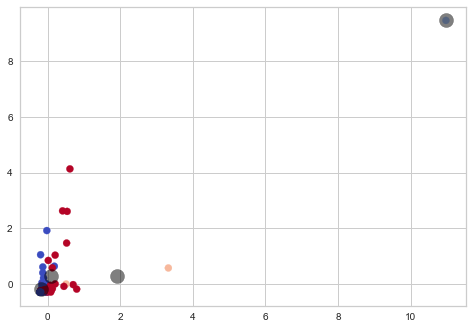

In [74]:
centroids = model.cluster_centers_

plt.scatter(X[:,18], X[:,19], c = value_df.cluster, s = 50, cmap = "coolwarm")
plt.scatter(centroids[:,18], centroids[:,19], c = "black", s = 200, alpha=0.5);

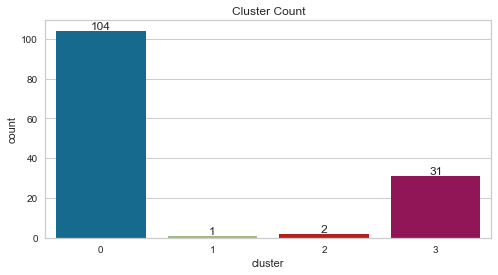

In [75]:
plt.figure(figsize=(8,4))
plt.title("Cluster Count")
ax = sns.countplot(x = value_df.cluster)
ax.bar_label(ax.containers[0])
plt.show();

In [76]:
value_df[value_df["cluster"] == 0]

country  Military Strength Power Index  \
0    Afghanistan                           1.34   
1        Albania                           2.31   
3         Angola                           0.84   
4      Argentina                           0.65   
5        Armenia                           2.13   
..           ...                            ...   
131      Uruguay                           1.89   
132   Uzbekistan                           0.81   
135        Yemen                           1.24   
136       Zambia                           1.65   
137     Zimbabwe                           1.76   

     Airforce Strength_Aircraft Strength value  \
0                                       260.00   
1                                        19.00   
3                                       295.00   
4                                       227.00   
5                                        64.00   
..                                         ...   
131                                      50.00   
132                                     185.00   
135                                     169.00   
136                                     108.00   
137                                      90.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
0                                                 0.00      
1                                                 0.00      
3                                                72.00      
4                                                24.00      
5                                                 0.00      
..                                                 ...      
131                                               0.00      
132                                              66.00      
135                                              77.00      
136                                              18.00      
137                                              10.00      

     Airforce Strength_Attack Aircraft Strength value  \
0                                               25.00   
1                                                0.00   
3                                               18.00   
4                                                7.00   
5                                                9.00   
..                                                ...   
131                                              7.00   
132                                             20.00   
135                                              0.00   
136                                              0.00   
137                                              0.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
0                                                30.00           
1                                                 0.00           
3                                                30.00           
4                                                 9.00           
5                                                 3.00           
..                                                 ...           
131                                               9.00           
132                                              18.00           
135                                               8.00           
136                                              11.00           
137                                              14.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
0                                              0.00   
1                                              0.00   
3                                             47.00   
4                                             64.00   
5                                             13.00   
..                                              ...   
131                                           16.00   
132                                            2.00   
135                                           21.00   
136                               

In [77]:
value_df[value_df["cluster"] == 1]

country  Military Strength Power Index  \
130  United States                           0.06   

     Airforce Strength_Aircraft Strength value  \
130                                  13,264.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
130                                           2,085.00      

     Airforce Strength_Attack Aircraft Strength value  \
130                                            715.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
130                                             945.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
130                                        2,643.00   

     Airforce Strength_Helicopter Fleet Strength value  \
130                                           5,768.00   

     Airforce Strength_Attack Helicopter Fleet Strength value  \
130                                             967.00          

     Land Strength_Tank Strength value  Land Strength_AFV/APC Strength value  \
130                           6,289.00                             39,253.00   

     Land Strength_Self-Propelled Artillery Strength value  \
130                                           1,465.00       

     Land Strength_Towed Artillery Strength value  \
130                                      2,740.00   

     Land Strength_Rocket Projector Strength value  \
130                                       1,366.00   

     Navy Strength_Navy Fleet Strengths value  \
130                                    490.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
130                                              20.00     

     Navy Strength_Submarine Fleet Strength value  \
130                                         66.00   

     Navy Strength_Destroyer Fleet Strength value  \
130                                         91.00   

     Navy Strength_Frigate Fleet Strength value  \
130                                        0.00   

     Finances_defense spending budget value  Finances_External Debt value  \
130                      750,000,000,000.00         17,910,000,000,000.00   

     Logistics_Airport Totals value  Natural resources_Oil Production value  \
130                       13,513.00                            9,352,000.00   

     Natural resources_Oil Consumption value  \
130                            20,000,000.00   

     Natural resources_Proven Oil Reserves value  \
130                            36,520,000,000.00   

     Manpower_Available Manpower value  Manpower_Total Population value  \
130                     144,872,845.00                   329,256,465.00   

     cluster  
130        1

In [78]:
value_df[value_df["cluster"] == 2]

country  Military Strength Power Index  \
26    China                           0.07   
101  Russia                           0.07   

     Airforce Strength_Aircraft Strength value  \
26                                    3,210.00   
101                                   4,163.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
26                                            1,232.00      
101                                             873.00      

     Airforce Strength_Attack Aircraft Strength value  \
26                                             371.00   
101                                            742.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
26                                              224.00           
101                                             424.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
26                                           314.00   
101                                          497.00   

     Airforce Strength_Helicopter Fleet Strength value  \
26                                              911.00   
101                                           1,522.00   

     Airforce Strength_Attack Helicopter Fleet Strength value  \
26                                              281.00          
101                                             531.00          

     Land Strength_Tank Strength value  Land Strength_AFV/APC Strength value  \
26                            3,500.00                             33,000.00   
101                          12,950.00                             27,038.00   

     Land Strength_Self-Propelled Artillery Strength value  \
26                                            3,800.00       
101                                           6,083.00       

     Land Strength_Towed Artillery Strength value  \
26                                       3,600.00   
101                                      4,465.00   

     Land Strength_Rocket Projector Strength value  \
26                                        2,650.00   
101                                       3,860.00   

     Navy Strength_Navy Fleet Strengths value  \
26                                     777.00   
101                                    603.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
26                                                2.00     
101                                               1.00     

     Navy Strength_Submarine Fleet Strength value  \
26                                          74.00   
101                                         62.00   

     Navy Strength_Destroyer Fleet Strength value  \
26                                          36.00   
101                                         16.00   

     Navy Strength_Frigate Fleet Strength value  \
26                                        52.00   
101                                       10.00   

     Finances_defense spending budget value  Finances_External Debt value  \
26                       237,000,000,000.00          1,598,000,000,000.00   
101                       48,000,000,000.00            539,600,000,000.00   

     Logistics_Airport Totals value  Natural resources_Oil Production value  \
26                           507.00                            3,838,000.00   
101                        1,218.00                           10,580,000.00   

     Natural resources_Oil Consumption value  \
26                             13,500,000.00   
101                             3,225,000.00   

     Natural resources_Proven Oil Reserves value  \
26                             25,620,000,000.00   
101                            80,000,000,000.00   

     Manpower_Available Manpower value  Manpower_Total Population value  \
26                      752,855,402.00                 1,384,688,986.00   
101                      69,640,160.00                   142,122,776.00   

     cluster  
26         2  
101        2

In [79]:
value_df[value_df["cluster"] == 3]

country  Military Strength Power Index  \
2                 Algeria                           0.47   
17                 Brazil                           0.20   
22                 Canada                           0.37   
27               Colombia                           0.60   
35                  Egypt                           0.19   
40                 France                           0.17   
43                Germany                           0.22   
45                 Greece                           0.53   
49                  India                           0.10   
50              Indonesia                           0.25   
51                   Iran                           0.22   
52                   Iraq                           0.79   
54                 Israel                           0.31   
55                  Italy                           0.21   
57                  Japan                           0.15   
73                 Mexico                           0.61   
79                Myanmar                           0.57   
87            North Korea                           0.37   
91               Pakistan                           0.24   
102          Saudi Arabia                           0.30   
110           South Korea                           0.15   
112                 Spain                           0.34   
118                 Syria                           0.82   
119                Taiwan                           0.40   
122              Thailand                           0.36   
124                Turkey                           0.21   
127               Ukraine                           0.45   
128  United Arab Emirates                           0.70   
129        United Kingdom                           0.17   
133             Venezuela                           0.64   
134               Vietnam                           0.36   

     Airforce Strength_Aircraft Strength value  \
2                                       551.00   
17                                      715.00   
22                                      385.00   
27                                      469.00   
35                                    1,054.00   
40                                    1,229.00   
43                                      712.00   
45                                      566.00   
49                                    2,123.00   
50                                      462.00   
51                                      509.00   
52                                      348.00   
54                                      589.00   
55                                      860.00   
57                                    1,561.00   
73                                      484.00   
79                                      276.00   
87                                      949.00   
91                                    1,372.00   
102                                     879.00   
110                                   1,649.00   
112                                     512.00   
118                                     456.00   
119                                     744.00   
122                                     570.00   
124                                   1,055.00   
127                                     297.00   
128                                     538.00   
129                                     733.00   
133                                     260.00   
134                                     293.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
2                                               103.00      
17                                               43.00      
22                                               62.00      
27                                               21.00      
35                                              215.00      
40                                              269.00      
43                                              128.00      
45      

### Evaluate 

In [80]:
from sklearn.metrics import silhouette_score

In [81]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.4956608189413284


In [82]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8644786857054572
For n_clusters=3, the silhouette score is 0.8193950812093086
For n_clusters=4, the silhouette score is 0.4956608189413284
For n_clusters=5, the silhouette score is 0.5177311271740322
For n_clusters=6, the silhouette score is 0.48669858072616184
For n_clusters=7, the silhouette score is 0.48632074984250384
For n_clusters=8, the silhouette score is 0.47714406079950733


In [83]:
den = pd.DataFrame(X,columns=value_df.drop(["country","cluster"],axis=1).columns)
den["cluster"] = value_df["cluster"]

clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster                                                0     1     2     3
Military Strength Power Index                       0.28 -1.06 -1.06 -0.83
Airforce Strength_Aircraft Strength value          -0.24 10.49  2.69  0.29
Airforce Strength_Fighter/Interceptor Strength ... -0.28  8.73  4.23  0.39
Airforce Strength_Attack Aircraft Strength value   -0.22  7.32  5.64  0.15
Airforce Strength_Transport Aircraft Fleet Stre... -0.23  9.94  3.19  0.26
Airforce Strength_Trainer Aircraft Fleet value     -0.25 10.67  1.34  0.41
Airforce Strength_Helicopter Fleet Strength value  -0.22 10.83  2.05  0.26
Airforce Strength_Attack Helicopter Fleet Stren... -0.21  9.71  3.92  0.14
Land Strength_Tank Strength value                  -0.30  3.74  5.02  0.55
Land Strength_AFV/APC Strength value               -0.33  6.82  5.11  0.56
Land Strength_Self-Propelled Artillery Strength... -0.24  1.83  6.90  0.30
Land Strength_Towed Artillery Strength value       -0.33  2.92  4.53  0.73
Land Strength_Rocket Projector Strength value      -0.23  2.51  6.42  0.29
Navy Strength_Navy Fleet Strengths value           -0.35  2.96  4.38  0.79
Navy Strength_Aircraft Carrier Fleet Strength v... -0.17 10.95  0.66  0.16
Navy Strength_Submarine Fleet Strength value       -0.28  4.94  5.10  0.45
Navy Strength_Destroyer Fleet Strength value       -0.18  9.79  2.66  0.12
Navy Strength_Frigate Fleet Strength value         -0.32 -0.49  4.73  0.79
Finances_defense spending budget value             -0.17 10.97  1.92  0.10
Finances_External Debt value                       -0.18  9.45  0.30  0.30
Logistics_Airport Totals value                     -0.15 10.94  0.47  0.12
Natural resources_Oil Production value             -0.25  5.28  3.99  0.41
Natural resources_Oil Consumption value            -0.25  8.93  3.54  0.33
Natural resources_Proven Oil Reserves value        -0.21  0.58  0.96  0.62
Manpower_Available Manpower value                  -0.20  1.42  4.58  0.34
Manpower_Total Population value                    -0.21  1.68  4.32  0.36

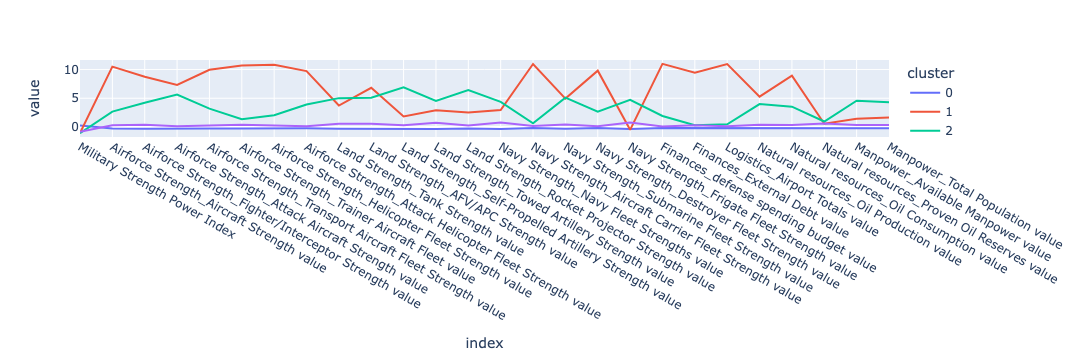

In [84]:
fig= px.line(clus_pred)
fig.show()

## Hierarchical Clustering

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [86]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

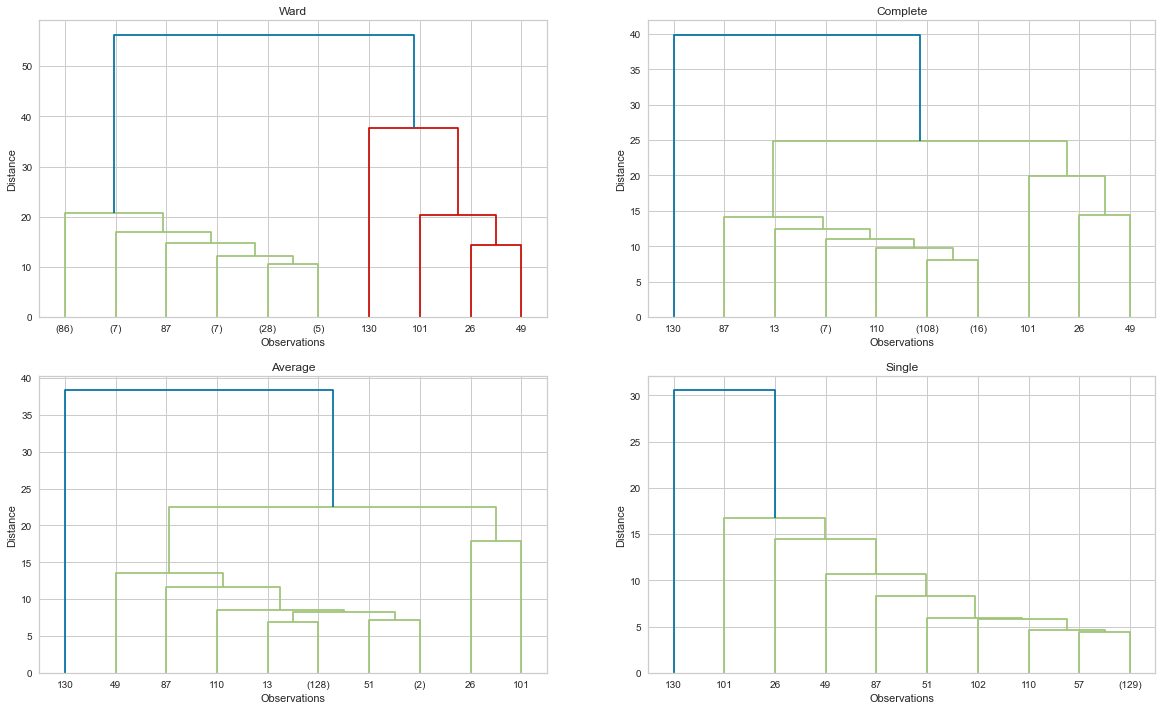

In [87]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward,truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

### Model Building and label visualisation

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3])

In [90]:
value_df["cluster_1"] = model1.labels_

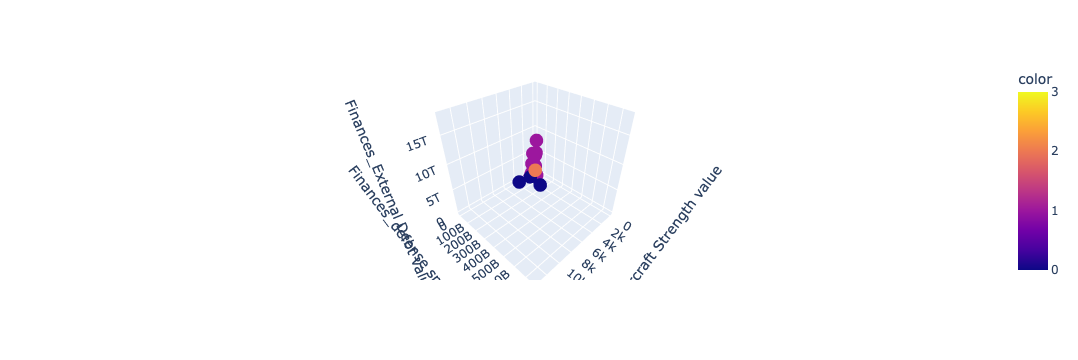

In [91]:
fig = px.scatter_3d(x=value_df["Airforce Strength_Aircraft Strength value"],
                   y=value_df["Finances_defense spending budget value"],
                   z=value_df["Finances_External Debt value"],
                   color=value_df.cluster_1,
                   labels = {"x": "Airforce Strength_Aircraft Strength value",
                             "y": "Finances_defense spending budget value",
                             "z": "Finances_External Debt value"},
                   hover_name=value_df["country"])

fig.show()

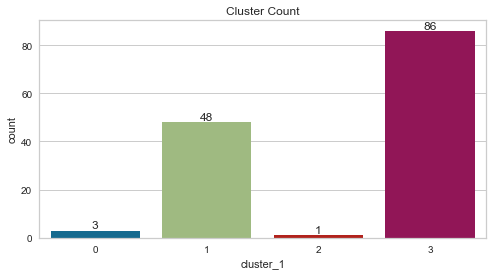

In [92]:
plt.figure(figsize=(8,4))
plt.title("Cluster Count")
ax = sns.countplot(x = value_df.cluster_1)
ax.bar_label(ax.containers[0])
plt.show();

In [93]:
value_df[value_df["cluster_1"] == 0]

country  Military Strength Power Index  \
26    China                           0.07   
49    India                           0.10   
101  Russia                           0.07   

     Airforce Strength_Aircraft Strength value  \
26                                    3,210.00   
49                                    2,123.00   
101                                   4,163.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
26                                            1,232.00      
49                                              538.00      
101                                             873.00      

     Airforce Strength_Attack Aircraft Strength value  \
26                                             371.00   
49                                             172.00   
101                                            742.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
26                                              224.00           
49                                              250.00           
101                                             424.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
26                                           314.00   
49                                           359.00   
101                                          497.00   

     Airforce Strength_Helicopter Fleet Strength value  \
26                                              911.00   
49                                              722.00   
101                                           1,522.00   

     Airforce Strength_Attack Helicopter Fleet Strength value  \
26                                              281.00          
49                                               23.00          
101                                             531.00          

     Land Strength_Tank Strength value  Land Strength_AFV/APC Strength value  \
26                            3,500.00                             33,000.00   
49                            4,292.00                              8,686.00   
101                          12,950.00                             27,038.00   

     Land Strength_Self-Propelled Artillery Strength value  \
26                                            3,800.00       
49                                              235.00       
101                                           6,083.00       

     Land Strength_Towed Artillery Strength value  \
26                                       3,600.00   
49                                       4,060.00   
101                                      4,465.00   

     Land Strength_Rocket Projector Strength value  \
26                                        2,650.00   
49                                          266.00   
101                                       3,860.00   

     Navy Strength_Navy Fleet Strengths value  \
26                                     777.00   
49                                     285.00   
101                                    603.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
26                                                2.00     
49                                                1.00     
101                                               1.00     

     Navy Strength_Submarine Fleet Strength value  \
26                                          74.00   
49                                          16.00   
101                                         62.00   

     Navy Strength_Destroyer Fleet Strength value  \
26                                          36.00   
49                                          10.00   
101                                         16.00   

     Navy Strength_Frigate Fleet Strength value  \
26                                        52.00   
49                                        13.00   
101                                       10.00   

     Finances_defense spending budget value  Finances_External Debt value  \
26                

In [94]:
value_df[value_df["cluster_1"] == 1]

country  Military Strength Power Index  \
2                 Algeria                           0.47   
6               Australia                           0.32   
10             Bangladesh                           0.71   
11                Belarus                           0.82   
17                 Brazil                           0.20   
18               Bulgaria                           0.89   
22                 Canada                           0.37   
25                  Chile                           0.77   
27               Colombia                           0.60   
32                Denmark                           0.79   
35                  Egypt                           0.19   
39                Finland                           0.85   
40                 France                           0.17   
43                Germany                           0.22   
45                 Greece                           0.53   
50              Indonesia                           0.25   
51                   Iran                           0.22   
52                   Iraq                           0.79   
54                 Israel                           0.31   
55                  Italy                           0.21   
57                  Japan                           0.15   
58                 Jordan                           1.14   
61                 Kuwait                           1.57   
70               Malaysia                           0.65   
73                 Mexico                           0.61   
77                Morocco                           0.84   
79                Myanmar                           0.57   
82            Netherlands                           0.59   
87            North Korea                           0.37   
91               Pakistan                           0.24   
94                   Peru                           0.62   
96                 Poland                           0.34   
97               Portugal                           0.86   
100               Romania                           0.62   
102          Saudi Arabia                           0.30   
105             Singapore                           0.80   
109          South Africa                           0.50   
110           South Korea                           0.15   
112                 Spain                           0.34   
118                 Syria                           0.82   
119                Taiwan                           0.40   
122              Thailand                           0.36   
124                Turkey                           0.21   
127               Ukraine                           0.45   
128  United Arab Emirates                           0.70   
129        United Kingdom                           0.17   
133             Venezuela                           0.64   
134               Vietnam                           0.36   

     Airforce Strength_Aircraft Strength value  \
2                                       551.00   
6                                       464.00   
10                                      177.00   
11                                      202.00   
17                                      715.00   
18                                       63.00   
22                                      385.00   
25                                      282.00   
27                                      469.00   
32                                      113.00   
35                                    1,054.00   
39                                      194.00   
40                                    1,229.00   
43                                      712.00   
45                                      566.00   
50                                      462.00   
51                                      509.00   
52                                      348.00   
54                                      589.00   
55                                      860.00   
57                         

In [95]:
value_df[value_df["cluster_1"] == 2]

country  Military Strength Power Index  \
130  United States                           0.06   

     Airforce Strength_Aircraft Strength value  \
130                                  13,264.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
130                                           2,085.00      

     Airforce Strength_Attack Aircraft Strength value  \
130                                            715.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
130                                             945.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
130                                        2,643.00   

     Airforce Strength_Helicopter Fleet Strength value  \
130                                           5,768.00   

     Airforce Strength_Attack Helicopter Fleet Strength value  \
130                                             967.00          

     Land Strength_Tank Strength value  Land Strength_AFV/APC Strength value  \
130                           6,289.00                             39,253.00   

     Land Strength_Self-Propelled Artillery Strength value  \
130                                           1,465.00       

     Land Strength_Towed Artillery Strength value  \
130                                      2,740.00   

     Land Strength_Rocket Projector Strength value  \
130                                       1,366.00   

     Navy Strength_Navy Fleet Strengths value  \
130                                    490.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
130                                              20.00     

     Navy Strength_Submarine Fleet Strength value  \
130                                         66.00   

     Navy Strength_Destroyer Fleet Strength value  \
130                                         91.00   

     Navy Strength_Frigate Fleet Strength value  \
130                                        0.00   

     Finances_defense spending budget value  Finances_External Debt value  \
130                      750,000,000,000.00         17,910,000,000,000.00   

     Logistics_Airport Totals value  Natural resources_Oil Production value  \
130                       13,513.00                            9,352,000.00   

     Natural resources_Oil Consumption value  \
130                            20,000,000.00   

     Natural resources_Proven Oil Reserves value  \
130                            36,520,000,000.00   

     Manpower_Available Manpower value  Manpower_Total Population value  \
130                     144,872,845.00                   329,256,465.00   

     cluster  cluster_1  
130        1          2

In [96]:
value_df[value_df["cluster_1"] == 3]

country  Military Strength Power Index  \
0    Afghanistan                           1.34   
1        Albania                           2.31   
3         Angola                           0.84   
4      Argentina                           0.65   
5        Armenia                           2.13   
..           ...                            ...   
131      Uruguay                           1.89   
132   Uzbekistan                           0.81   
135        Yemen                           1.24   
136       Zambia                           1.65   
137     Zimbabwe                           1.76   

     Airforce Strength_Aircraft Strength value  \
0                                       260.00   
1                                        19.00   
3                                       295.00   
4                                       227.00   
5                                        64.00   
..                                         ...   
131                                      50.00   
132                                     185.00   
135                                     169.00   
136                                     108.00   
137                                      90.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
0                                                 0.00      
1                                                 0.00      
3                                                72.00      
4                                                24.00      
5                                                 0.00      
..                                                 ...      
131                                               0.00      
132                                              66.00      
135                                              77.00      
136                                              18.00      
137                                              10.00      

     Airforce Strength_Attack Aircraft Strength value  \
0                                               25.00   
1                                                0.00   
3                                               18.00   
4                                                7.00   
5                                                9.00   
..                                                ...   
131                                              7.00   
132                                             20.00   
135                                              0.00   
136                                              0.00   
137                                              0.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
0                                                30.00           
1                                                 0.00           
3                                                30.00           
4                                                 9.00           
5                                                 3.00           
..                                                 ...           
131                                               9.00           
132                                              18.00           
135                                               8.00           
136                                              11.00           
137                                              14.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
0                                              0.00   
1                                              0.00   
3                                             47.00   
4                                             64.00   
5                                             13.00   
..                                              ...   
131                                           16.00   
132                                            2.00   
135                                           21.00   
136                               

### Evaluate 

In [97]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster_1)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.3546913282067596


# DBSCAN 

In [98]:
from sklearn.cluster import DBSCAN


In [99]:
np.linspace(0.1,2,20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [100]:
z=0
for i in np.linspace(0.1,2,20) :
    for x in range(1,10):
        model2 = DBSCAN(eps=i,min_samples=x)
        if pd.Series(model2.fit_predict(X)).nunique() == 4:
            print(i,x)
            #break

0.4 2
0.4 3


In [101]:
model2 = DBSCAN(eps=0.4,min_samples=3)


In [102]:
model2.fit_predict(X)

array([-1,  0, -1, -1, -1,  0, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1,  0,
       -1, -1,  0, -1,  0, -1,  0,  0, -1, -1, -1,  1, -1,  1, -1, -1,  0,
       -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1,  0,  0,  1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,
        0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1,  1,  2, -1,  1,  0,  2, -1, -1,  0, -1,  0, -1,  2, -1, -1, -1,
       -1,  0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,
        0,  0])

In [103]:
value_df["cluster_2"] = model2.labels_

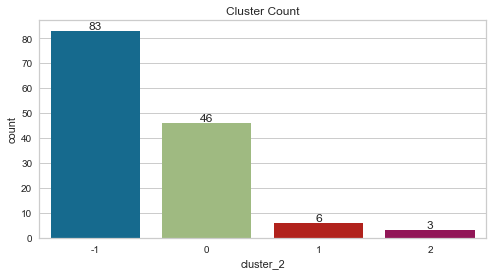

In [104]:
plt.figure(figsize=(8,4))
plt.title("Cluster Count")
ax = sns.countplot(x = value_df.cluster_2)
ax.bar_label(ax.containers[0])
plt.show();

In [105]:
value_df[value_df["cluster_2"] == 2]

country  Military Strength Power Index  \
104  Sierra Leone                           4.21   
108       Somalia                           4.64   
115      Suriname                           4.60   

     Airforce Strength_Aircraft Strength value  \
104                                       5.00   
108                                       0.00   
115                                       3.00   

     Airforce Strength_Fighter/Interceptor Strength value  \
104                                               0.00      
108                                               0.00      
115                                               0.00      

     Airforce Strength_Attack Aircraft Strength value  \
104                                              0.00   
108                                              0.00   
115                                              0.00   

     Airforce Strength_Transport Aircraft Fleet Strength value  \
104                                               0.00           
108                                               0.00           
115                                               0.00           

     Airforce Strength_Trainer Aircraft Fleet value  \
104                                            0.00   
108                                            0.00   
115                                            0.00   

     Airforce Strength_Helicopter Fleet Strength value  \
104                                               5.00   
108                                               0.00   
115                                               3.00   

     Airforce Strength_Attack Helicopter Fleet Strength value  \
104                                               2.00          
108                                               0.00          
115                                               0.00          

     Land Strength_Tank Strength value  Land Strength_AFV/APC Strength value  \
104                               0.00                                 13.00   
108                              10.00                                100.00   
115                               0.00                                 66.00   

     Land Strength_Self-Propelled Artillery Strength value  \
104                                               0.00       
108                                               0.00       
115                                               0.00       

     Land Strength_Towed Artillery Strength value  \
104                                          0.00   
108                                         30.00   
115                                          0.00   

     Land Strength_Rocket Projector Strength value  \
104                                           0.00   
108                                          10.00   
115                                           0.00   

     Navy Strength_Navy Fleet Strengths value  \
104                                     10.00   
108                                      3.00   
115                                      3.00   

     Navy Strength_Aircraft Carrier Fleet Strength value  \
104                                               0.00     
108                                               0.00     
115                                               0.00     

     Navy Strength_Submarine Fleet Strength value  \
104                                          0.00   
108                                          0.00   
115                                          0.00   

     Navy Strength_Destroyer Fleet Strength value  \
104                                          0.00   
108                                          0.00   
115                                          0.00   

     Navy Strength_Frigate Fleet Strength value  \
104                                        0.00   
108                                        0.00   
115                                        0.00   

     Finances_defense spending budget value  Finances_External Debt value  \
